In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(len(train))
train.head(5)

60000


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


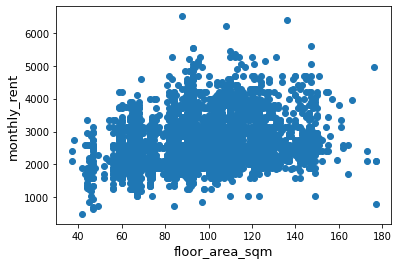

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = train['floor_area_sqm'][0:5000], y = train['monthly_rent'][0:5000])
plt.ylabel('monthly_rent', fontsize=13)
plt.xlabel('floor_area_sqm', fontsize=13)

plt.show()
# Positively correlated

In [4]:
print("{} unique records in 'street_name'".format(train["street_name"].nunique()))
print("{} unique records in 'subzone'".format(train["subzone"].nunique()))
print("{} unique records in 'planning area'".format(train["planning_area"].nunique()))
print("{} unique records in 'flat_model'".format(train["flat_model"].nunique()))
print("{} unique records in 'town'".format(train["town"].nunique()))
print("{} unique records in 'flat-type'".format(train["flat_type"].nunique()))

1083 unique records in 'street_name'
152 unique records in 'subzone'
29 unique records in 'planning area'
19 unique records in 'flat_model'
26 unique records in 'town'
9 unique records in 'flat-type'


In [5]:
# The dataset is integrate, with no missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   60000 non-null  object 
 1   town                 60000 non-null  object 
 2   block                60000 non-null  object 
 3   street_name          60000 non-null  object 
 4   flat_type            60000 non-null  object 
 5   flat_model           60000 non-null  object 
 6   floor_area_sqm       60000 non-null  float64
 7   furnished            60000 non-null  object 
 8   lease_commence_date  60000 non-null  int64  
 9   latitude             60000 non-null  float64
 10  longitude            60000 non-null  float64
 11  elevation            60000 non-null  float64
 12  subzone              60000 non-null  object 
 13  planning_area        60000 non-null  object 
 14  region               60000 non-null  object 
 15  monthly_rent         60000 non-null 

D:\GameDownload\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


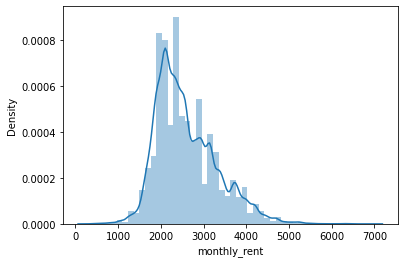

In [6]:
# Value of the Y axis is the probability density function of each price.
sns.distplot(train["monthly_rent"])
plt.show()

In [3]:
stockPriceDf = pd.read_csv("auxiliary-data/sg-stock-prices.csv")
mrtExistingDf = pd.read_csv("auxiliary-data/sg-mrt-existing-stations.csv")
mrtPlannedDf = pd.read_csv("auxiliary-data/sg-mrt-planned-stations.csv")
shoppingMallsDf = pd.read_csv("auxiliary-data/sg-shopping-malls.csv")
schoolsDf = pd.read_csv("auxiliary-data/sg-primary-schools.csv")
coePriceDf = pd.read_csv("auxiliary-data/sg-coe-prices.csv")

In [8]:
# The changes of the stock price reflects the long-run price level of a country. 
# Choose the adjusted price as the symbol for the long run price level.
stockPriceDf = stockPriceDf.loc[:, ["name", "symbol", "date", "adjusted_close"]]
stockPriceDf.head()

,name,symbol,date,adjusted_close
0,DBS Group,D05.SI,2021-01-04,22.833
1,DBS Group,D05.SI,2021-01-05,22.842
2,DBS Group,D05.SI,2021-01-06,22.689
3,DBS Group,D05.SI,2021-01-07,23.473
4,DBS Group,D05.SI,2021-01-08,24.707


In [15]:
stockPriceDf['date'] = pd.to_datetime(stockPriceDf['date'])
stockPriceDf

,name,symbol,date,adjusted_close
0,DBS Group,D05.SI,2021-01-04,22.833
1,DBS Group,D05.SI,2021-01-05,22.842
2,DBS Group,D05.SI,2021-01-06,22.689
3,DBS Group,D05.SI,2021-01-07,23.473
4,DBS Group,D05.SI,2021-01-08,24.707
...,...,...,...,...
35493,Triterras,TRIRF,2023-07-24,0.001
35494,Triterras,TRIRF,2023-07-25,0.001
35495,Triterras,TRIRF,2023-07-26,0.001
35496,Triterras,TRIRF,2023-07-27,0.001


In [16]:
# Group the stock data by month and stock name, calculate the average price for each stock monthly
groupedStock = stockPriceDf.groupby(["symbol", stockPriceDf["date"].dt.to_period("M")])['adjusted_close'].mean().reset_index()

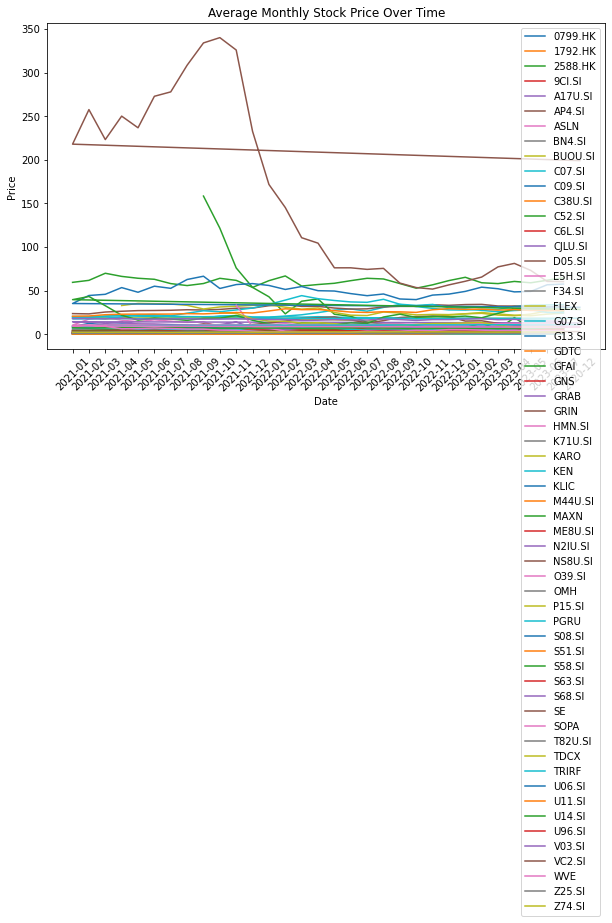

In [38]:
groupedStock.columns = ['stock', 'date', 'price']
groupedStock_byName = groupedStock.groupby('stock')
plt.figure(figsize=(10, 6))
for name, group in groupedStock_byName:
    dates = group['date'].dt.strftime('%Y-%m')
    plt.plot(dates, group['price'], label=name)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Average Monthly Stock Price Over Time')
plt.xticks(rotation=45)
plt.show()

In [56]:
rent_price_month = train[["rent_approval_date", "monthly_rent"]]
rent_price_month

,rent_approval_date,monthly_rent
0,2021-09,1600
1,2022-05,2250
2,2022-10,1900
3,2021-08,2850
4,2022-11,2100
...,...,...
59995,2021-09,2200
59996,2023-04,4100
59997,2022-06,2250
59998,2023-01,4700


In [59]:
groupedStock["date"] = groupedStock['date'].dt.strftime('%Y-%m')

In [68]:
merged_stock_rental = pd.merge(groupedStock, rent_price_month, left_on="date", right_on="rent_approval_date")
merged_stock_rental

,stock,date,price,rent_approval_date,monthly_rent
0,0799.HK,2021-01,8.4873,2021-01,2100
1,0799.HK,2021-01,8.4873,2021-01,2100
2,0799.HK,2021-01,8.4873,2021-01,2150
3,0799.HK,2021-01,8.4873,2021-01,2000
4,0799.HK,2021-01,8.4873,2021-01,2950
...,...,...,...,...,...
3298274,Z74.SI,2023-07,2.5393,2023-07,4000
3298275,Z74.SI,2023-07,2.5393,2023-07,3350
3298276,Z74.SI,2023-07,2.5393,2023-07,4500
3298277,Z74.SI,2023-07,2.5393,2023-07,750


In [79]:
corrolation_stock = merged_stock_rental.groupby("stock").apply(lambda x: x["price"].corr(x["monthly_rent"])).reset_index(name="Corralation")
corrolation_stock.head(10)

,stock,Corralation
0,0799.HK,-0.404912
1,1792.HK,-0.327069
2,2588.HK,-0.072806
3,9CI.SI,0.068286
4,A17U.SI,0.057811
5,AP4.SI,-0.361280
6,ASLN,-0.406320
7,BN4.SI,0.439774
8,BUOU.SI,-0.281146
9,C07.SI,0.497138


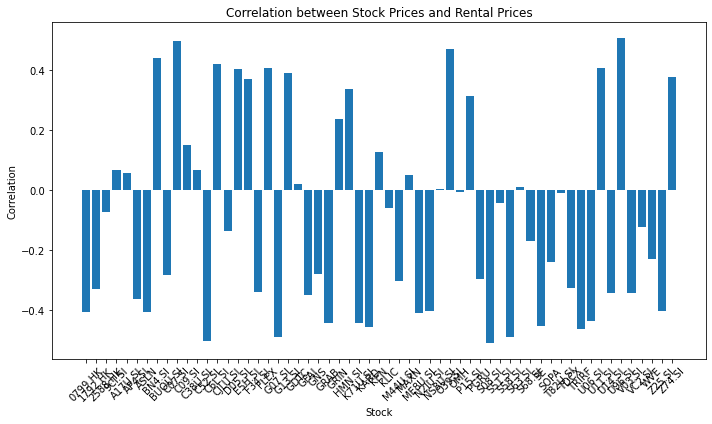

In [81]:
plt.figure(figsize=(10, 6))
plt.bar(corrolation_stock['stock'], corrolation_stock['Corralation'])
plt.xlabel('Stock')
plt.ylabel('Correlation')
plt.title('Correlation between Stock Prices and Rental Prices')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [82]:
corrolation_stock.max()

stock            Z74.SI
Corralation    0.508181
dtype: object

Above all, there exists median-level correlation between stock prices and the rental rate and the price of certain stocks. In the future process of this auxiliary data, we consider making an index for a group of stocks with relatively higher correlation with the rental rate to reduce the effects of the fluctuations of the general price level.